# Según Rich esta clase va a ser divertida

## Problema planetario
$$
\frac{d\vec{p}}{dt} = -\frac{GMm}{\vert\vec{r}-\vec{r_m} \vert} \widehat{(\vec{r}-\vec{r_M})} \cdots (1)
$$

Estando en el plano XY, trabajando en la masa mayor (o en el centro de masa):
$ \vec{r_M}=\vec{0}$ 

Entonces nuestra ecuación se vuelve: 
$$
\frac{d^2 \vec{r}}{dt^2} = -\frac{GM}{r^2} \widehat{r}
$$
Si escalamos el tiempo (haciendo un cambio de variable):
$$
t_1= t\sqrt{GM}
$$

$$
\frac{d}{dt}= \frac{dt_1}{dt}\frac{d}{dt_1} = \sqrt{GM}\frac{d}{dt}
$$

$$
\frac{d^2}{dt^2}=GM\frac{d^2}{dt^2_1}
$$

Otro cambio de variable que podemos hacer es con el radio:
$$
\vec{\rho}=\frac{\vec{r}}{R_T}
$$
Donde $ R_T= <\vec{r}(t) >$

Ahora si lo sustituímos en la ecuación: 
$$
\frac{d^2\vec{\rho}}{dt}=-\frac{GM}{\rho^2 R^3_T} \widehat{\rho}
$$
Con un tiempo escalado $\tau$
$$
\tau= \sqrt{\frac{GM}{R^3_T}}t \cdots (2)
$$

$$
\frac{d^2}{dt^2} = -\frac{GM}{R^3_T}\frac{d^2}{d\tau^2}
$$
Entonces: 
$$
\frac{d^2 \vec{\rho}}{d\tau^2} = -\frac{\widehat{\rho}}{\rho^2} \cdots(3)
$$

Entonces sabemos que el periodo está dado por :
$$
\frac{(2\pi)^2}{GM} R^3_T =T^2 \cdots (4)
$$

Si mi sistema fuera periódico, el periodo sería $2\pi$ (que es la única suposición que hemos hecho). La ecuación 4 es una forma muy fancy de hacer una báscula... uuuu

Lo que queremos programar es la ecuación (4) donde las unidades las definimos en (2)

Ahora vamos a utilizar el método de R-K, nuestro método sin nombre de segundo orden y otro de cuarto orden para ver cuál se acerca más a la realidad y otro. 

In [81]:
from pylab import *
%matplotlib inline
%run "mis_integradores.ipynb" #esto llama a un código de otro notebook 

Hay que resolver: 
$$
\frac{d^2 \vec{\rho}}{d\tau^2} = -\frac{\widehat{\rho}}{\rho^2}
$$

Donde $ \ddot{\vec{\rho}} = (\ddot{\rho_x},\ddot{\rho_y})$ y $\ddot{\vec{\rho}}=-\frac{\vec{\rho}}{\rho^3}$

$ \dot{\rho_x}=V_{\rho x} , \dot{\rho_y}=V_{\rho y} , \dot{V}_{\rho x} = \frac{-\rho_x}{\rho^3} , \dot{V}_{\rho y} = \frac{-\rho_y}{\rho^3} $

### Esta integración la vamos a hacer con el método de RK de segundo orden

In [82]:
def mov_planeta (x,t):
    r3 = (x[0]**2 + x[1]**2)**(1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    return array([drx,dry,dvrx,dvry])

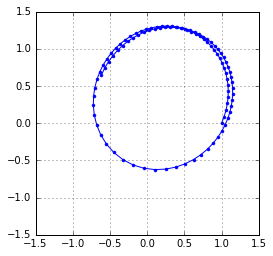

CPU times: user 209 ms, sys: 5.75 ms, total: 215 ms
Wall time: 213 ms


In [120]:
%%time
t,r_vr = rk2(mov_planeta,[1,0,0.4,0.9],[0,10],0.1)
xlim([-1.5,1.5]) #te escala los límites de la gráfica en el eje x sólo sirve para el "plot" que estás haciendo
ylim([-1.5,1.5])#te escala los límites de la gráfica en el eje y
axes().set_aspect('equal') #hace que la escala de los ejes sea 1:1
grid(True)
plot(r_vr[:,0],r_vr[:,1],'.-')
show()

### Ahora vamos a trabajar con el otro método que usa al jacobiano

$\vec{J}= $ ( \begin{array}{lrc} 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\frac{2\rho^2_x-\rho^2_y}{\rho^5} & \frac{3\rho^2_x \rho_y}{\rho^5} & 0 & 0 \\
\frac{3\rho^2_x \rho_y}{\rho^5} & \frac{2\rho^2_y-\rho^2_x}{\rho^5} & 0 & 0
\end{array} )



In [109]:
def J_mov_planeta(x,y):
    d_ec = array([0,0,0,0])
    r5 = (x[0]**2 + x[1]**2)**(2.5)
    rxmry = (2*x[0]*x[0] - x[1]*x[1])/r5
    rymrx = (2*x[1]*x[1] - x[0]*x[0])/r5
    rxry = (3*x[0]*x[1])/r5
    Jac = array([[0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0]])
    return d_ec,Jac

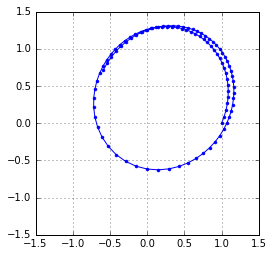

CPU times: user 211 ms, sys: 5.49 ms, total: 217 ms
Wall time: 217 ms


In [121]:
%%time
t,r_vr = integra2(mov_planeta,J_mov_planeta,[1,0,0.4,0.9],[0,10],0.1)
xlim([-1.5,1.5]) #te escala los límites de la gráfica en el eje x sólo sirve para el "plot" que estás haciendo
ylim([-1.5,1.5])#te escala los límites de la gráfica en el eje y
axes().set_aspect('equal') #hace que la escala de los ejes sea 1:1
grid(True)
plot(r_vr[:,0],r_vr[:,1],'.-')
show()

### Usando el método de RK de cuarto orden 
Aquí usamos las mismas cosas que para el de rk2 pero a la hora de dar los valores nomás usamos el rk4

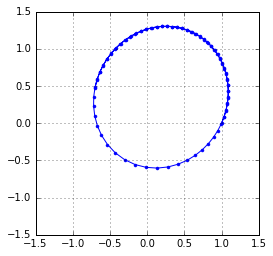

CPU times: user 204 ms, sys: 6.23 ms, total: 211 ms
Wall time: 208 ms


In [122]:
%%time
t,r_vr = rk4(mov_planeta,[1,0,0.4,0.9],[0,10],0.1)
xlim([-1.5,1.5]) #te escala los límites de la gráfica en el eje x sólo sirve para el "plot" que estás haciendo
ylim([-1.5,1.5])#te escala los límites de la gráfica en el eje y
axes().set_aspect('equal') #hace que la escala de los ejes sea 1:1
grid(True)
plot(r_vr[:,0],r_vr[:,1],'.-')
show()

Con este método sí se cierra la órbita :) :)

### Ahora vamos a usar el método de python "odeint"

In [112]:
from scipy.integrate import *

In [113]:
h=0.1
tiempos = arange(0,10+h,h)

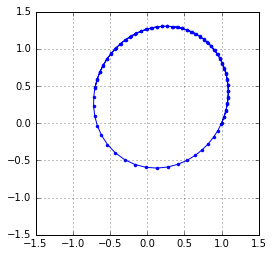

CPU times: user 257 ms, sys: 7.34 ms, total: 265 ms
Wall time: 264 ms


In [127]:
%%time
r_vr=odeint(mov_planeta,[1,0,0.4,0.9],tiempos)
xlim([-1.5,1.5]) #te escala los límites de la gráfica en el eje x sólo sirve para el "plot" que estás haciendo
ylim([-1.5,1.5])#te escala los límites de la gráfica en el eje y
axes().set_aspect('equal') #hace que la escala de los ejes sea 1:1
grid(True)
plot(r_vr[:,0],r_vr[:,1],'.-')
show()

Esto se llama "la hodógrafa" y es una cosa muy rara

#### La Hodógrafa: 
Es un mapeo en el que uno agarra todos los puntos desde el centro de atracción (uno de los focos) y toma todos los vectores de velovidad y los ponen en un ramo de flores (que no es el centro) pero todos los puntos de los vectores de velocidad tienen magnitud tal que forman un círculo... si nos agarráramos todos los vectores aceleración, nos daría un cachito de círculo. 

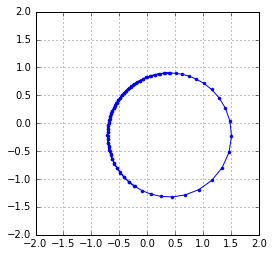

CPU times: user 231 ms, sys: 8.52 ms, total: 240 ms
Wall time: 237 ms


In [128]:
%%time
xlim([-2,2]) #te escala los límites de la gráfica en el eje x sólo sirve para el "plot" que estás haciendo
ylim([-2,2])#te escala los límites de la gráfica en el eje y
axes().set_aspect('equal') #hace que la escala de los ejes sea 1:1
grid(True)
plot(r_vr[:,2],r_vr[:,3],'.-')
show()